In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
sns.set(context='notebook',style='darkgrid',palette='dark')

In [2]:
# Montamos nuestro drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file = '/content/drive/MyDrive/BITACORA - Grupo 3/04 INTERPRETACIÓN DE DATOS S02G03/Capstone/Database/incom2024_delay_example_dataset.csv'
df = pd.read_csv(file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type              15549 non-null  object 
 1   profit_per_order          15549 non-null  float64
 2   sales_per_customer        15549 non-null  float64
 3   category_id               15549 non-null  float64
 4   category_name             15549 non-null  object 
 5   customer_city             15549 non-null  object 
 6   customer_country          15549 non-null  object 
 7   customer_id               15549 non-null  float64
 8   customer_segment          15549 non-null  object 
 9   customer_state            15549 non-null  object 
 10  customer_zipcode          15549 non-null  float64
 11  department_id             15549 non-null  float64
 12  department_name           15549 non-null  object 
 13  latitude                  15549 non-null  float64
 14  longit

In [4]:
df.sample(5)

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
1930,DEBIT,23.964100,87.97981,45.0,Hunting & Shooting,Los Angeles,EE. UU.,2224.25540,Home Office,FL,...,Caribbean,Castile and Leon,COMPLETE,1004.0,43.0,ENO Atlas Hammock Straps,24.996424,2015-01-25 00:00:00+00:00,Second Class,1
9547,TRANSFER,123.405740,278.98000,17.0,Cleats,Caguas,EE. UU.,7798.87200,Consumer,FL,...,Central America,Guatemala,PENDING,365.0,17.0,Perfect Fitness Perfect Rip Deck,59.990000,2015-06-19 00:00:00+01:00,Standard Class,1
4430,PAYMENT,60.551014,127.39000,18.0,Men's Footwear,Chicago,EE. UU.,6881.42720,Home Office,IL,...,Caribbean,Santo Domingo,PENDING_PAYMENT,403.0,18.0,Nike Men's CJ Elite 2 TD Football Cleat,129.990000,2017-04-23 00:00:00+01:00,Standard Class,-1
10651,DEBIT,10.172336,127.41012,18.0,Men's Footwear,Columbia,EE. UU.,215.50421,Consumer,MO,...,Western Europe,Lodz,COMPLETE,403.0,18.0,Nike Men's CJ Elite 2 TD Football Cleat,129.990000,2017-06-30 00:00:00+01:00,Second Class,1
2327,PAYMENT,3.242202,164.46610,48.0,Water Sports,Caguas,Puerto Rico,985.83167,Corporate,PR,...,Caribbean,Santiago de Cuba,PENDING_PAYMENT,1073.0,48.0,Pelican Sunstream 100 Kayak,199.990000,2017-11-07 00:00:00+00:00,Standard Class,-1


In [5]:
file_describe = '/content/drive/MyDrive/BITACORA - Grupo 3/04 INTERPRETACIÓN DE DATOS S02G03/Capstone/Database/incom2024_delay_variable_description.csv'
df_describe = pd.read_csv(file_describe)
df_describe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   variable_name  41 non-null     object
 1   type           41 non-null     object
 2   description    41 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB


In [6]:
df_describe

,variable_name,type,description
0,payment_type,categorical,Type of transaction made
1,profit_per_order,numerical,Earnings per order placed
2,sales_per_customer,numerical,Total sales per customer made per customer
3,category_id,numerical,Product category code
4,category_name,text,Description of the product category
5,customer_city,categorical,City where the customer made the purchase
6,customer_country,categorical,Country where the customer made the purchase
7,customer_id,numerical,Customer ID
8,customer_segment,categorical,"Types of Customers Consumer, Corporate, Home O..."
9,customer_state,categorical,State to which the store where the purchase is...


In [7]:
df.describe(include=['float64', 'int64'])

,profit_per_order,sales_per_customer,category_id,customer_id,customer_zipcode,department_id,latitude,longitude,order_customer_id,order_id,...,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total_amount,order_profit_per_order,product_card_id,product_category_id,product_price,label
count,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,...,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000
mean,22.604542,179.888256,31.461342,6583.279789,35458.234968,5.413462,29.677619,-84.512318,6586.810354,35718.970019,...,137.005272,0.120391,2.165202,200.562289,179.780850,22.273342,685.213286,31.387606,136.629368,0.349283
std,99.265198,113.727323,15.303616,4114.273782,37343.702033,1.581550,9.877876,20.681015,4101.324290,21071.742668,...,134.545269,0.474088,1.468627,125.984986,110.999735,117.503163,330.778230,15.256620,133.366285,0.826623
min,-3442.500000,8.351162,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025990,1.000000,1.000000,...,9.990000,-2.750000,1.000000,9.990000,7.490000,-3442.500000,19.000000,2.000000,9.990000,-1.000000
25%,7.562795,104.397330,18.000000,3119.983200,725.000000,4.000000,18.263327,-98.088170,3177.568800,16530.752000,...,50.000000,0.080000,1.000000,119.980000,105.570910,7.443977,403.000000,18.000000,50.000000,0.000000
50%,31.693370,165.944170,29.000000,6429.229000,19145.775000,5.000000,33.435677,-76.580800,6308.530000,35391.336000,...,59.990000,0.270000,1.000000,199.920000,165.990000,32.440100,627.000000,29.000000,59.990000,1.000000
75%,63.872166,242.440930,45.000000,9642.381000,77502.820000,7.000000,39.277313,-66.370575,9703.070000,55236.910000,...,199.990000,0.360000,3.000000,299.950000,242.436400,64.303566,1004.000000,45.000000,199.990000,1.000000
max,911.800000,1939.990000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263080,20757.000000,77204.000000,...,1999.990000,0.500000,5.000000,1999.990000,1939.990000,911.800000,1363.000000,76.000000,1999.990000,1.000000


In [8]:
df.describe(exclude=['float64', 'int64'])

,payment_type,category_name,customer_city,customer_country,customer_segment,customer_state,department_name,market,order_city,order_country,order_date,order_region,order_state,order_status,product_name,shipping_date,shipping_mode
count,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549
unique,4,49,555,2,3,44,11,5,2742,152,1162,23,982,7,113,1170,4
top,DEBIT,Cleats,Caguas,EE. UU.,Consumer,PR,Fan Shop,Europe,Santo Domingo,United States,2017-04-22 00:00:00+01:00,Western Europe,England,COMPLETE,Perfect Fitness Perfect Rip Deck,2015-05-20 00:00:00+01:00,Standard Class
freq,6148,2212,5964,9438,8332,6109,5708,4578,214,2048,43,2513,654,5290,2219,52,9116


<Axes: xlabel='label', ylabel='count'>

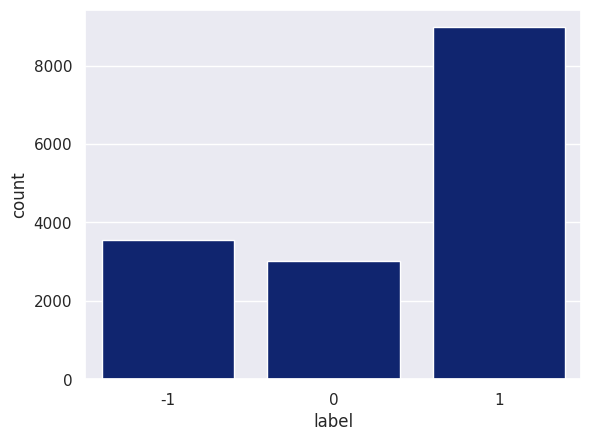

In [21]:
sns.countplot(x='label',data= df)

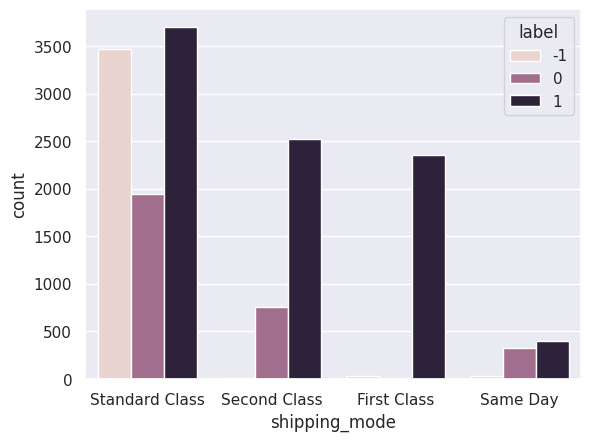

In [22]:
sns.countplot(x='shipping_mode', data= df, hue= 'label')
plt.show()

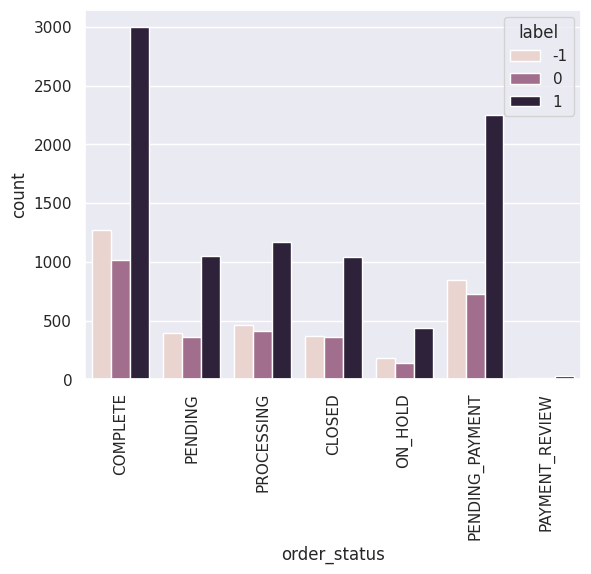

In [24]:
sns.countplot(x='order_status', data= df, hue= 'label')
plt.xticks(rotation=90)
plt.show()

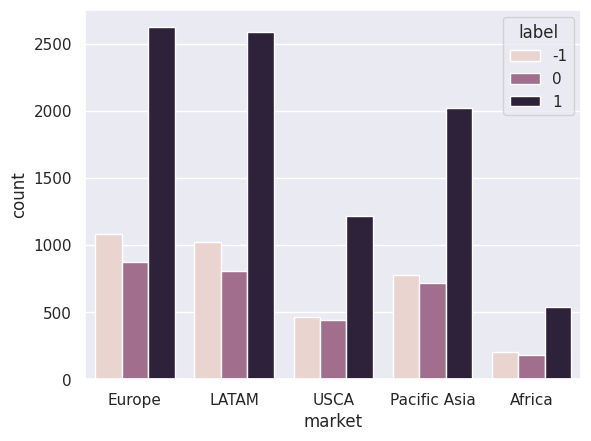

In [25]:
sns.countplot(x='market', data= df, hue= 'label')
plt.show()

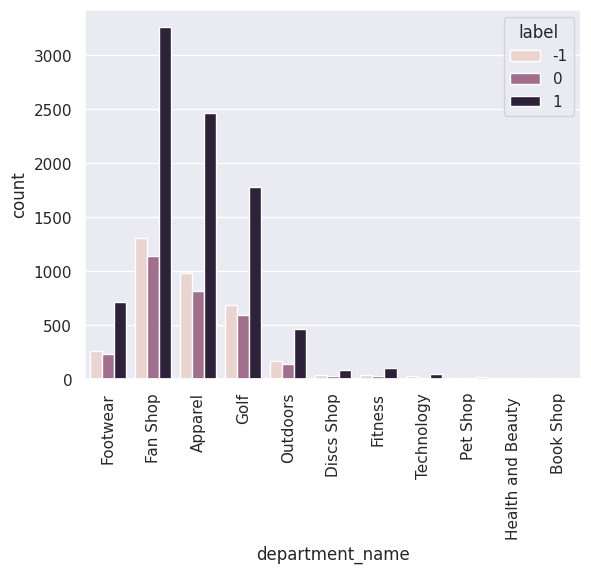

In [30]:
sns.countplot(x='department_name', data= df, hue= 'label')
plt.xticks(rotation=90)
plt.show()

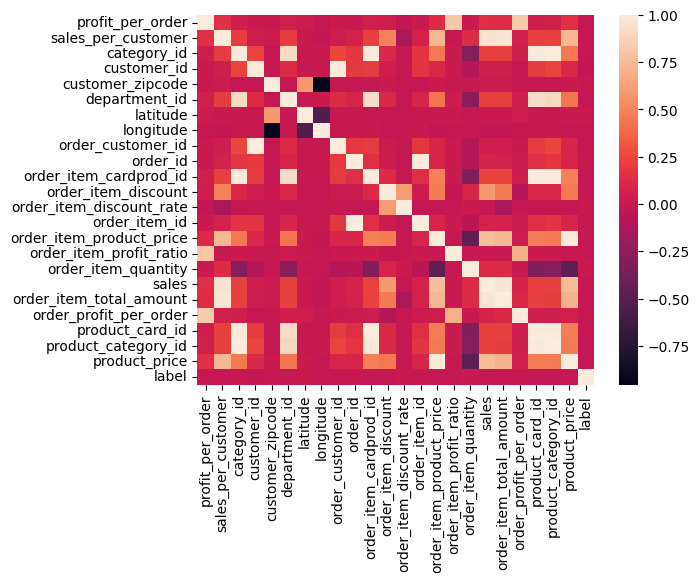

In [ ]:
df_num = df.select_dtypes(include=['float64', 'int64'])
corr = df_num.corr()
sns.heatmap(corr)

plt.show()

In [10]:
df_delayed = df[df['label']==1]
df_ontime = df[df['label']==0]
df_earlyarrival = df[df['label']==-1]

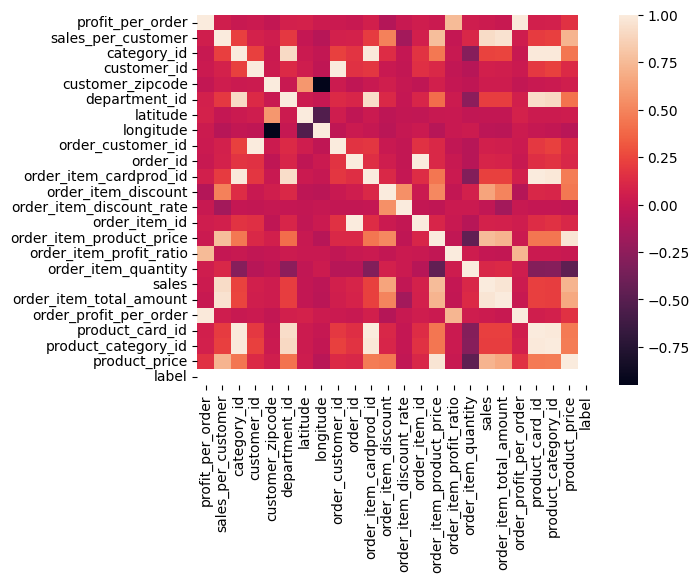

In [11]:
df_ontime_num = df_ontime.select_dtypes(include=['float64', 'int64'])
corr_ontime = df_ontime_num.corr()
sns.heatmap(corr_ontime)

plt.show()

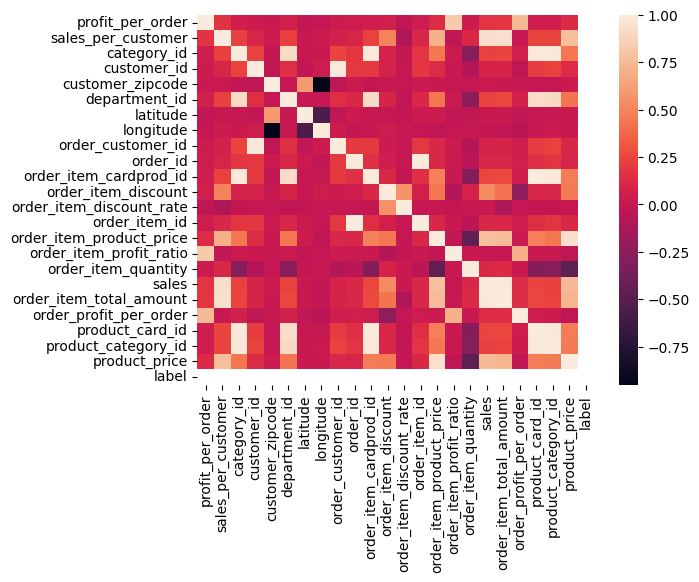

In [12]:
df_earlyarrival_num = df_earlyarrival.select_dtypes(include=['float64', 'int64'])
corr_earlyarrival = df_earlyarrival_num.corr()
sns.heatmap(corr_earlyarrival)

plt.show()

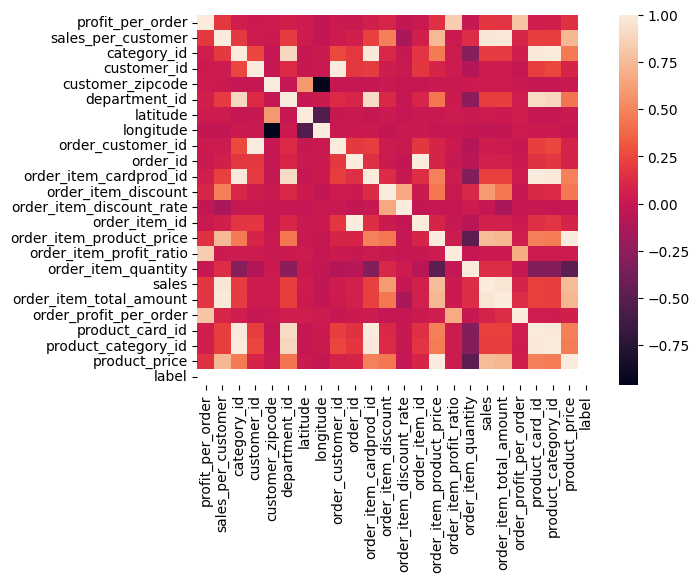

In [13]:
df_delayed_num = df_delayed.select_dtypes(include=['float64', 'int64'])
corr_delayed = df_delayed_num.corr()
sns.heatmap(corr_delayed)

plt.show()

In [ ]:
sample = df.sample(frac=0.01, random_state=42)
sns.pairplot(data=sample, hue='label') # Este método como minimo solo necesita el parámetro data
plt.show()

<Axes: xlabel='shipping_date', ylabel='sales'>

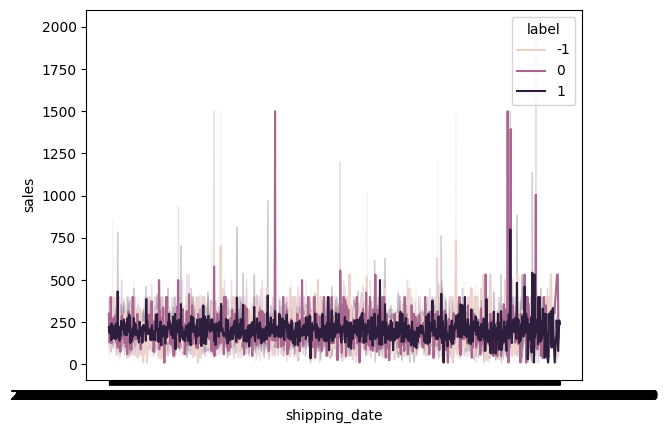

In [ ]:
sns.lineplot(x='shipping_date', y='sales' , hue= 'label', data=df)
